In [52]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from sklearn import datasets
import random
import sys


In [53]:
delta = 1.0
Reg_param = 1.0
C_param = 0.1
batch_size = 32
num_steps = 10000
is_evaluation = True
initial_learning_rate = 0.1

##
# SVM中的正则化和损失是什么？ - 王赟 Maigo的回答 - 知乎
# https://www.zhihu.com/question/30230784/answer/47837249
# loss = c*sum(hinge_loss) + r*L2,c如果很大的话就是硬间隔，否则可以有些妥协

def loss_fn(W,b,x_data,y_target):
    logits = tf.add(tf.matmul(x_data, W),b)
    norm_term = tf.divide(tf.reduce_sum(tf.multiply(tf.transpose(W),W)),2)
    classification_loss = tf.reduce_mean(tf.maximum(0., tf.subtract(delta, tf.multiply(logits, y_target))))
    total_loss = tf.add(tf.multiply(C_param, classification_loss), tf.multiply(Reg_param, norm_term))
    return total_loss


In [54]:
def inference_fn(W,b,x_data,y_target):
    prediction = tf.sign(tf.add(tf.matmul(x_data, W), b))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))
    return accuracy


In [55]:
def next_batch_fn(x_train,y_train,num_samples=batch_size):
    index = np.random.choice(len(x_train), size=num_samples)
    X_batch = x_train[index]
    y_batch = np.transpose([y_train[index]])
    return X_batch, y_batch

In [56]:
iris = datasets.load_iris()
X = iris.data[:,:2]
#iris是多分类，至少有0、1、2三类，这里只是简单区分，没有其他意义
y = np.array([1 if label==0 else -1 for label in iris.target])
my_randoms = np.random.choice(X.shape[0], X.shape[0], replace=False)
train_indices = my_randoms[0:int(0.5*X.shape[0])]
test_indices = my_randoms[int(0.5*X.shape[0]):]

x_train = X[train_indices]
y_train = y[train_indices]
x_test = X[test_indices]
y_test = y[test_indices]


In [57]:

#############################
### Defining Placeholders ###
#############################

x_data = tf.placeholder(shape=[None, X.shape[1]], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
W = tf.Variable(tf.random_normal(shape=[X.shape[1],1]))
bias = tf.Variable(tf.random_normal(shape=[1,1]))

# Calculation of loss and accuracy.
total_loss = loss_fn(W, bias, x_data, y_target)
accuracy = inference_fn(W, bias, x_data, y_target)

# Defining train_op
train_op = tf.train.GradientDescentOptimizer(initial_learning_rate).minimize(total_loss)

In [58]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [59]:
for step_idx in range(num_steps):
    X_batch, y_batch = next_batch_fn(x_train, y_train, num_samples=batch_size)
    #sess.run(train_op, feed_dict={x_data:X_batch, y_target:y_batch})
    #loss_step = sess.run(total_loss, feed_dict={x_data:X_batch, y_target:y_batch})
    sess.run([train_op,total_loss],feed_dict={x_data:X_batch, y_target:y_batch})
    
    train_acc_step = sess.run(accuracy, feed_dict={x_data: x_train, y_target:np.transpose([y_train])})
    test_acc_step = sess.run(accuracy, feed_dict={x_data: x_test, y_target: np.transpose([y_test])})

    if (step_idx+1) % 100 == 0:
        print('step #%d, training accuracy= %% %.2f, testing accuracy= %% %.2f' %(step_idx+1, float(100 * train_acc_step), float(100 * test_acc_step)))


step #100, training accuracy= % 72.00, testing accuracy= % 74.67
step #200, training accuracy= % 70.67, testing accuracy= % 65.33
step #300, training accuracy= % 73.33, testing accuracy= % 77.33
step #400, training accuracy= % 77.33, testing accuracy= % 78.67
step #500, training accuracy= % 88.00, testing accuracy= % 85.33
step #600, training accuracy= % 96.00, testing accuracy= % 94.67
step #700, training accuracy= % 88.00, testing accuracy= % 85.33
step #800, training accuracy= % 90.67, testing accuracy= % 93.33
step #900, training accuracy= % 96.00, testing accuracy= % 96.00
step #1000, training accuracy= % 96.00, testing accuracy= % 96.00
step #1100, training accuracy= % 96.00, testing accuracy= % 97.33
step #1200, training accuracy= % 96.00, testing accuracy= % 97.33
step #1300, training accuracy= % 98.67, testing accuracy= % 100.00
step #1400, training accuracy= % 98.67, testing accuracy= % 100.00
step #1500, training accuracy= % 98.67, testing accuracy= % 100.00
step #1600, trai

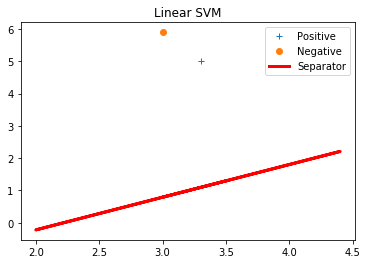

In [60]:
if is_evaluation:
    [[w1], [w2]] = sess.run(W)
    [[b]] = sess.run(bias)
    x_line = [data[1] for data in X]

    # Find the separator line.
    line = []
    line = [-w2/w1*i+b/w1 for i in x_line]

    # coor_pos_list = [positive_X, positive_y]
    # coor_neg_list = [negative_X, negative_y]

    for index, data in enumerate(X):
        if y[index] == 1:
            positive_X = data[1]
            positive_y = data[0]
        elif y[index] == -1:
            negative_X = data[1]
            negative_y = data[0]
        else:
            sys.exit("Invalid label!")
    
    # uncomment if plotting is desired!
    # Plotting the SVM decision boundary.
    plt.plot(positive_X, positive_y, '+', label='Positive')
    plt.plot(negative_X, negative_y, 'o', label='Negative')
    plt.plot(x_line, line, 'r-', label='Separator', linewidth=3)
    plt.legend(loc='best')
    plt.title('Linear SVM')
    plt.show()